<a href="https://colab.research.google.com/github/IrinaFab/Bank-MK/blob/main/BankMkt_K_means_August.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Marketing Bank Dataset EDA

#### The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

#### [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

#### Available at:

[pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001\n",
        
[bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt"

In [ ]:
# Import libraries
## Basic libraries
import pandas as pd
import numpy as np
from operator import itemgetter 
import warnings
from pandas._libs import index

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.cluster import KMeans
# some metrics that help us how many clusters
from sklearn.metrics import silhouette_score      
from sklearn.metrics import calinski_harabasz_score

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier  

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

Mounting Google Drive to Colab Environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

# data = pd.read_csv('/content/drive/MyDrive/bank.csv')

In [ ]:
print('Shape of dataframe:', data.shape)

Shape of dataframe: (41188, 21)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# displaying the data types and store into a variable
dt = data.dtypes
dt

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
# describing numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
TARGET = 'y'

In [ ]:
# set up the numeric lists
numList = []

for i in dt.index:
    if i in ([TARGET]) : continue
    if dt[i] in (['float64', 'int64']) : numList.append(i)    
        
print('NUMBERS')
print('-------')       
for i in numList:
    print(i)

NUMBERS
-------
age
duration
campaign
pdays
previous
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed


In [ ]:
# drop the target 
X = data.copy()
X = X.drop( [TARGET], axis=1 )
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
# drop the categorical variable; clustering is not ok with these variables 
# drop 'duration'
X = X.drop(['duration', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome'], axis = 1)

In [ ]:
X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
varNames = X.columns # save the names into varNames

In [ ]:
# standardize scaler

#theScaler = MinMaxScaler()
theScaler = StandardScaler() 
theScaler.fit( X ) 

X_TRN = theScaler.transform( X ) 
X_TRN = pd.DataFrame( X_TRN ) # turn into a df
print( X_TRN.head() )

          0         1         2         3         4         5         6  \
0  1.533034 -0.565922  0.195414 -0.349494  0.648092  0.722722  0.886447   
1  1.628993 -0.565922  0.195414 -0.349494  0.648092  0.722722  0.886447   
2 -0.290186 -0.565922  0.195414 -0.349494  0.648092  0.722722  0.886447   
3 -0.002309 -0.565922  0.195414 -0.349494  0.648092  0.722722  0.886447   
4  1.533034 -0.565922  0.195414 -0.349494  0.648092  0.722722  0.886447   

         7        8  
0  0.71246  0.33168  
1  0.71246  0.33168  
2  0.71246  0.33168  
3  0.71246  0.33168  
4  0.71246  0.33168  


In [ ]:
# name the variables
varNames_trn = []
for i in varNames :
    newName = 'trn_' + i
    varNames_trn.append( newName )
print( varNames_trn )
print( '\n')

X_TRN.columns = varNames_trn
print( X_TRN.head() )

['trn_age', 'trn_campaign', 'trn_pdays', 'trn_previous', 'trn_emp.var.rate', 'trn_cons.price.idx', 'trn_cons.conf.idx', 'trn_euribor3m', 'trn_nr.employed']


    trn_age  trn_campaign  trn_pdays  trn_previous  trn_emp.var.rate  \
0  1.533034     -0.565922   0.195414     -0.349494          0.648092   
1  1.628993     -0.565922   0.195414     -0.349494          0.648092   
2 -0.290186     -0.565922   0.195414     -0.349494          0.648092   
3 -0.002309     -0.565922   0.195414     -0.349494          0.648092   
4  1.533034     -0.565922   0.195414     -0.349494          0.648092   

   trn_cons.price.idx  trn_cons.conf.idx  trn_euribor3m  trn_nr.employed  
0            0.722722           0.886447        0.71246          0.33168  
1            0.722722           0.886447        0.71246          0.33168  
2            0.722722           0.886447        0.71246          0.33168  
3            0.722722           0.886447        0.71246          0.33168  
4            0.722722           0.

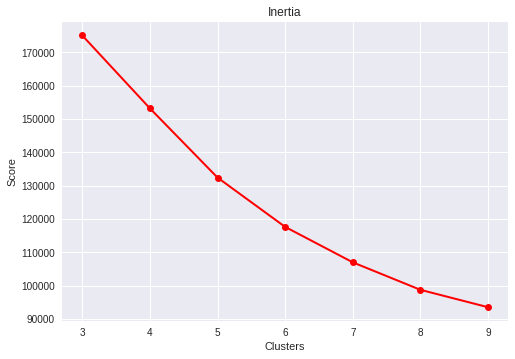

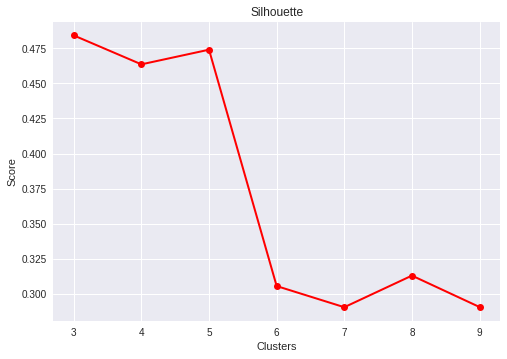

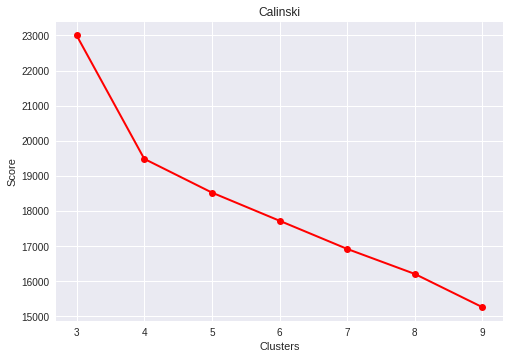

In [ ]:
K_LIST = []
I_LIST = []
S_LIST = []
C_LIST = []


# give Python a range of clusters; find a number that would be useful
for K in range(3,10) :
    km = KMeans( n_clusters=K, random_state = 1 )
    km.fit( X_TRN )
    #Y = km.predict( X_TRN )
    # save the range into a list
    K_LIST.append( K )
    I_LIST.append( km.inertia_ )
    S_LIST.append( silhouette_score(X_TRN,km.labels_) )
    C_LIST.append( calinski_harabasz_score(X_TRN,km.labels_) )

# for inertia, you want to look for the elbow point
def drawElbow( K, SCORE, LABEL ) :
    plt.plot( K , SCORE, 'ro-', linewidth=2)
    plt.title(LABEL)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.show()

drawElbow( K_LIST, I_LIST, 'Inertia' )
drawElbow( K_LIST, S_LIST, 'Silhouette' )
drawElbow( K_LIST, C_LIST, 'Calinski')

Inertia
* we need to look for the elbow - it starts at 5, so I do not want more than 5.

Silhouette
* you want the number be as high as possible, but again I do not really want the highest number. I may stop at 4.

Calinski
* 4 clusters

In [ ]:
def clusterData( DATA, TRN_DATA, K, TARGET ) :  # send my original data, my transformed data, bring the target back
    print('\n')
    print('K = ', K)
    print('=======')
    km = KMeans( n_clusters = K, random_state = 1 )
    km.fit( TRN_DATA )  
    Y = km.predict( TRN_DATA ) 
    DATA['CLUSTER'] = Y 
    print( DATA.head() )
    
    G = DATA.groupby('CLUSTER') 
    print( G.mean() )
    print('\n')
    print( G[ TARGET ].value_counts() ) 

clusterData( data, X_TRN, 4, TARGET )



K =  4
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  pdays  previous     poutcome  emp.var.rate  \
0   may         mon  ...    999         0  nonexistent           1.1   
1   may         mon  ...    999         0  nonexistent           1.1   
2   may         mon  ...    999         0  nonexistent           1.1   
3   may         mon  ...    999         0  nonexistent           1.1   
4   may         mon  ...    999         0  nonexistent           1.1   

  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  CLUSTER  
0         93.994          -36.

* for cluster 0: age average is 40.52, duration average 183.67, campaign 13..
* for cluster 1: age average 40.18, duration average 256.50, campaign 2.20..
* for cluster 2: age average 39.38, duration average 263.93, campaign 2.11..
* for cluster 3: age average 41.93, duration average 320.96, campaign 1.82...

* for cluster 0: no 1517 vs yes 61 
* for cluster 1: no 24804 vs yes 1275 
* for cluster 2: no 9659 vs yes 2333 
* for cluster 3: no 568 vs yes 971

In [ ]:
clusterData( data, X_TRN, 5, TARGET )



K =  5
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  pdays  previous     poutcome  emp.var.rate  \
0   may         mon  ...    999         0  nonexistent           1.1   
1   may         mon  ...    999         0  nonexistent           1.1   
2   may         mon  ...    999         0  nonexistent           1.1   
3   may         mon  ...    999         0  nonexistent           1.1   
4   may         mon  ...    999         0  nonexistent           1.1   

  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  CLUSTER  
0         93.994          -36.